<center><img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="100" /></center>

<h1><center>Deep Learning CV Project - Face Mask Detection</center><h1>

<center><img width=40% src="https://github.com/girishksahu/INSAID2022-DL-CV-Face-Mask-Detection/blob/SMART_Street/logo.png?raw=true"></center>

----
### **Table of Content**
----

**1**. [**Introduction**](#section1)<br>
  - **1.1** [**Problem Statement**](#section11)<br>
  - **1.2** [**Importing Libraries**](#section12)<br>
  
**2**. [**The Dataset**](#section2)<br>
  - **2.1** [**Load Dataset**](#section21)<br>
  - **2.2** [**Data Description**](#section22)<br>
  - **2.3** [**Dataset Structure**](#section23)<br>
  
**3**. [**Data Pre-Processing**](#section3)<br>
  - **3.1** [**Data Pre-Profiling**](#section31)<br>
  - **3.2** [**Data Pre-Processing**](#section32)<br>
  - **3.3** [**Data Post-Profiling**](#section33)<br>
  
**4**. [**Exploratory Data Analysis**](#section4)<br>

**5**. [**Data Post-Processing**](#section5)<br>
  - **5.1** [**Data Encoding**](#section51)<br>
  - **5.2** [**Data Preparation**](#section52)<br>
  - **5.3** [**Data Scaling**](#section53)<br>

**6**. [**Model Development & Evaluation**](#section6)<br>
  - **6.1** [**Build the Model**](#section61)<br>
  - **6.2** [**Inspect the Model**](#section62)<br>


<a name=section1></a>

----
## **1. Introduction**
----

- Your client for this project is a tech startup.
    - Masks play a crucial role in protecting the health of individuals against respiratory diseases, as is one of the few precautions available for COVID-19 in the absence of immunization.
    - Therefore, to protect each other, every person should wear a face mask properly when they are outdoors. However, most selfish people won’t wear the face mask properly for so many reasons.
    - To overcome this situation October Tech is working on a project to automatically detect whether a person is wearing a mask or not.
    - The researchers are building a model to detect people wearing masks, not wearing them, or wearing masks improperly.

**<h3>Current Scenario:</h3>**

- The detection of face masks can help prevent Covid-19 spread.
- Analyzing whether a person is wearing a mask properly is a manual task.
- However, Designing a computer program to do this turns out to be a bit trickier.

---
<a name = section11></a>
### **1.1 Problem Statement**
---

- **The current process suffers from the following problems:**
   - It is very difficult to identify whether all persons are wearing masks in a proper way.
   - It is tedious to hire a person to inspect individually.
   - This process is slow and time-consuming.


### **Your Role**

- You are given a dataset of images.

- Your task is to build a image classification model using the dataset.

     - Because there was no machine learning model for this problem in the company, you don’t have a quantifiable win condition.  
     - You need to build the best possible model.

### **Project Deliverables**
- Deliverable: **Face Mask Detection.**

- Machine Learning Task: **Image Classification**

- Target Variable: **Category**

### **Evaluation Metric**

- The model evaluation will be based on the Accuracy score.

<center><img src="https://github.com/girishksahu/INSAID2022-DL-CV-Face-Mask-Detection/blob/SMART_Street/Mask_detection.jpg?raw=true" width="500" /></center>

---
<a name = section12></a>
### **1.2 Importing Libraries**
---

In [133]:
# To use some functions from tensorflow_docs
#!pip install git+https://github.com/tensorflow/docs

In [134]:
#!pip install sweetviz

In [135]:
#------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
from scipy.stats import randint as sp_randint                       # For initializing random integer values
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
import seaborn as sns                                               # Importin seaborm library for interactive visualization
%matplotlib inline
import sklearn.metrics
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.preprocessing import StandardScaler                    # To scaled data with mean 0 and variance 1
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split                # To split the data in training and testing part     
# Importing WordCloud for text data visualization
from wordcloud import WordCloud

In [136]:
# Import tensorflow 2.x
# This code block will only work in Google Colab.
try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

In [137]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.7.0


In [138]:
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [139]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [140]:
import os
import glob
import shutil
import pathlib
import PIL
import PIL.Image

<a name=section2></a>

----
## **2. The Dataset**
----

- The Train dataset contains images of people with mask and without mask.


| Records | Features|
| :-- | :-- |
| 682 | 1 |
<br>

| ID | Feature Name | Description of the feature |
| :-- | :--| :--| 
|01| **Wearing Mask**   | 0    |
|02| **Not Wearing**   | 1       |
|03| **Not Wearing Correctly** | 2   |

- The **Test dataset** contains images of people with mask and without mask **Category** column value need to be predicted.

| Records | Features |
| :-- | :-- |
| 171 | 0 | 

<br>


<a name=section21></a>

### **2.1 Load Dataset**

- Load dataset and check shape of dataset.

In [141]:
# set base directory where images are located in filesystem
cur_dir = os.getcwd()
base_dir = os.path.join(os.path.dirname(cur_dir), 'FaceMaskDetection\\data\\data')

In [142]:
# set directory where training and test images are located in filesystem
train_dir = os.path.join(base_dir, 'train\\images')
test_dir = os.path.join(base_dir, 'test\\images')

In [143]:
# set the complete path of training image dataset
data_dir = pathlib.Path(train_dir)

In [144]:
# check number of images in training dataset folder
image_count = len(list(data_dir.glob('*.png')))
print(image_count)

682


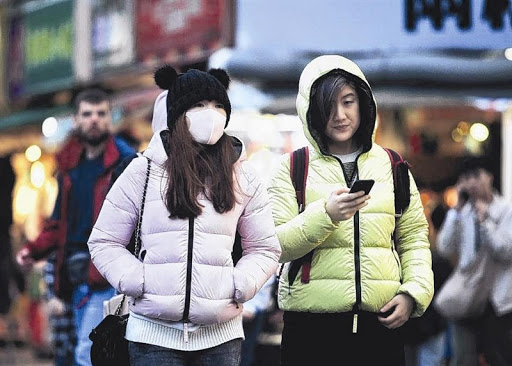

In [145]:
# display sample images from training dataset
sample = list(data_dir.glob('*'))
PIL.Image.open(str(sample[0]))

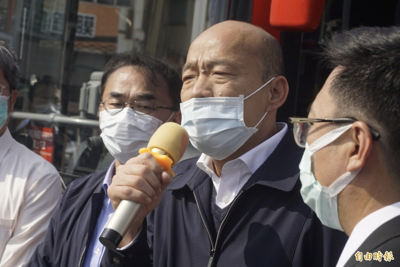

In [146]:
# display sample images from training dataset
PIL.Image.open(str(sample[681]))

In [147]:
# Load train dataset with image name and label information
train_df = pd.read_csv("https://raw.githubusercontent.com/girishksahu/INSAID2022-DL-CV-Face-Mask-Detection/SMART_Street/train_y_data.csv")

# Get the dimesions of data
print('Shape of the Training and Validation dataset:', train_df.shape)
# Get the structure of data
train_df.info()
# Output first 10 data rows
train_df.head(10)

Shape of the Training and Validation dataset: (682, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Image   682 non-null    object
 1   label   682 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 10.8+ KB


,Image,label
0,maksssksksss106.png,0
1,maksssksksss101.png,0
2,maksssksksss143.png,0
3,maksssksksss130.png,2
4,maksssksksss111.png,0
5,maksssksksss118.png,0
6,maksssksksss136.png,0
7,maksssksksss105.png,0
8,maksssksksss100.png,0
9,maksssksksss121.png,1


In [148]:
# get name of image file and image label (0-Wearing Mask, 1- Not Wearing, 2 - Not Wearing Correctly)
img_names = train_df['Image']
labels = train_df['label'].to_list()

In [149]:
# create image path name
imagePath = []
for name in img_names:
    imagePath.append(train_dir + '\\'+name)

In [150]:
# segreggate images as per class labels in respective class label folder
for index in train_df.index:
    if not os.path.exists(train_dir+'\\'+ str(labels[index])):
        os.makedirs(train_dir+'\\'+ str(labels[index]))
    shutil.copy(imagePath[index],train_dir+'\\'+ str(labels[index]))

In [151]:
# set batch size and image width and height
batch_size = 100
img_height = 180
img_width = 180

In [152]:
#create training dataset using Keras utility with validation split as 20%
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,labels=labels,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size, label_mode='int')

Found 682 files belonging to 3 classes.
Using 546 files for training.


In [153]:
# check class label in training dataset
class_names = train_ds.class_names
print(class_names)

['0', '1', '2']


In [154]:
#create validation dataset using Keras utility with validation split as 20%
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,labels=labels,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,label_mode='int')

Found 682 files belonging to 3 classes.
Using 136 files for validation.


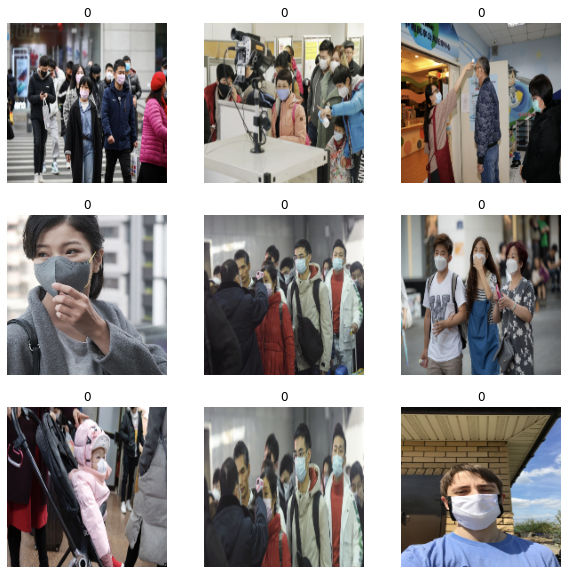

In [155]:
# display images from training dataset
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [156]:
# check shape of training dataset
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(100, 180, 180, 3)
(100,)


In [157]:
# use bufferred prefetching methods recommended by Keras for smooth disk I/O operation
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

<a name=section22></a>

### **2.2 Data Description**

- Get **information about the data** and capture observations.

**Observations:**
- NA

**Observations:**
- NA

<a name=section23></a>

### **2.3 Dataset Structure**

- Get **information about the dataset structure** and capture observations.

<a name = section3></a>

---
# **3. Data Pre-Processing**
---

<a name = section31></a>
### **3.1 Data Pre-Profiling**

- For **quick analysis** pandas profiling is very handy.

- Generates profile reports from a pandas DataFrame.

- For each column **statistics** are presented in an interactive HTML report.

<a name = section32></a>
### **3.2 Data Pre-Processing**

- We need to pre process few features before EDA and Model Evaluation as needed

<a name = section33></a>
### **3.3 Data Post-Profiling**

- We can run the pandas profiling report to get latest information

**Observations:**

- Not Applicable

<a name = section4></a>

---
# **4. Exploratory Data Analysis**
---

**NOTE**:  

- Exploratory Data Analysis will explore all the features and their relationship with other features
- Both non-graphical and graphical method will be used as applicable to respective features
- Both univariate and bivariate method be used as applicable to respective features

<a name = section5></a>

---
# **5. Data Post-Processing**
---


<a name = section51></a>
### **5.1 Data Encoding**

- In this section, we will encode our categorical features as necessary and drop any column as necessary

<a name = section52></a>
### **5.2 Data Preparation**

- We will **split** our **data** into **dependent** and **independent** variables for further development as needed.

<a name = section53></a>
### **5.3 Data Scaling**

-NA

<a name = section6></a>

---
# **6. Model Development & Evaluation**
---


<a name=section61></a>

### **6.1 Build the Model**

- Let's build our CNN model.

In [158]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  #layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])


In [159]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [160]:
%%time
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
6/6 [==============================] - 8s 1s/step - loss: 1.2605 - accuracy: 0.6850 - val_loss: 0.6781 - val_accuracy: 0.8015
Epoch 2/10
6/6 [==============================] - 7s 1s/step - loss: 0.6232 - accuracy: 0.8077 - val_loss: 0.6586 - val_accuracy: 0.8015
Epoch 3/10
6/6 [==============================] - 7s 1s/step - loss: 0.6283 - accuracy: 0.8077 - val_loss: 0.6498 - val_accuracy: 0.8015
Epoch 4/10
6/6 [==============================] - 7s 1s/step - loss: 0.5995 - accuracy: 0.8077 - val_loss: 0.6654 - val_accuracy: 0.8015
Epoch 5/10
6/6 [==============================] - 8s 1s/step - loss: 0.5911 - accuracy: 0.8077 - val_loss: 0.6759 - val_accuracy: 0.8015
Epoch 6/10
6/6 [==============================] - 8s 1s/step - loss: 0.5589 - accuracy: 0.8077 - val_loss: 0.6715 - val_accuracy: 0.8015
Epoch 7/10
6/6 [==============================] - 7s 1s/step - loss: 0.5415 - accuracy: 0.8077 - val_loss: 0.6856 - val_accuracy: 0.8015
Epoch 8/10
6/6 [=========================

<a name=section62></a>

### **6.2 Inspect the Model**

- Using the `.summary` method to print a simple description of the model

In [161]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 45, 45, 64)       

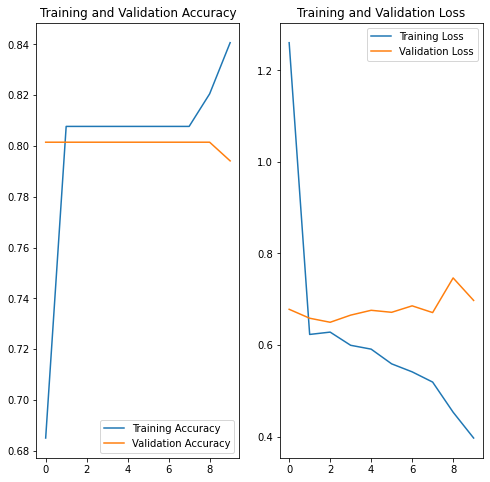

In [162]:
# create plots of loss and accuracy on the training and validation sets:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [163]:
test_images_list = os.listdir(test_dir)
#print(test_images_list)

In [164]:
# set the complete path of test image dataset
test_data_dir = pathlib.Path(test_dir)
test_images = list(test_data_dir.glob('*.png'))
#print(test_images)    

In [165]:
# prediction for test dataset images
test_data_predictions=[]
for test_img_path in test_images:
    img = tf.keras.utils.load_img(
    test_img_path, target_size=(img_height, img_width))
    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) # Create a batch
    #print (test_img_path)
    predictions = model.predict(img_array)
    #print (tf.nn.softmax(predictions))
    test_data_predictions.append(predictions)

In [166]:
# convert predictions into class label (0,1,2)
final_prediction=[]
for i in range(len(test_data_predictions)):
    score = tf.nn.softmax(test_data_predictions[i])
    final_prediction.append(class_names[np.argmax(score)])

In [167]:
# write predictions to CSV file for submission
output_dict={'Image': test_images_list,'label': final_prediction} 
output = pd.DataFrame(output_dict)
output.to_csv('Face-Mask-Detection-submission1.csv', index=False, header=False)

**Thank you and Happy Learning.**

---

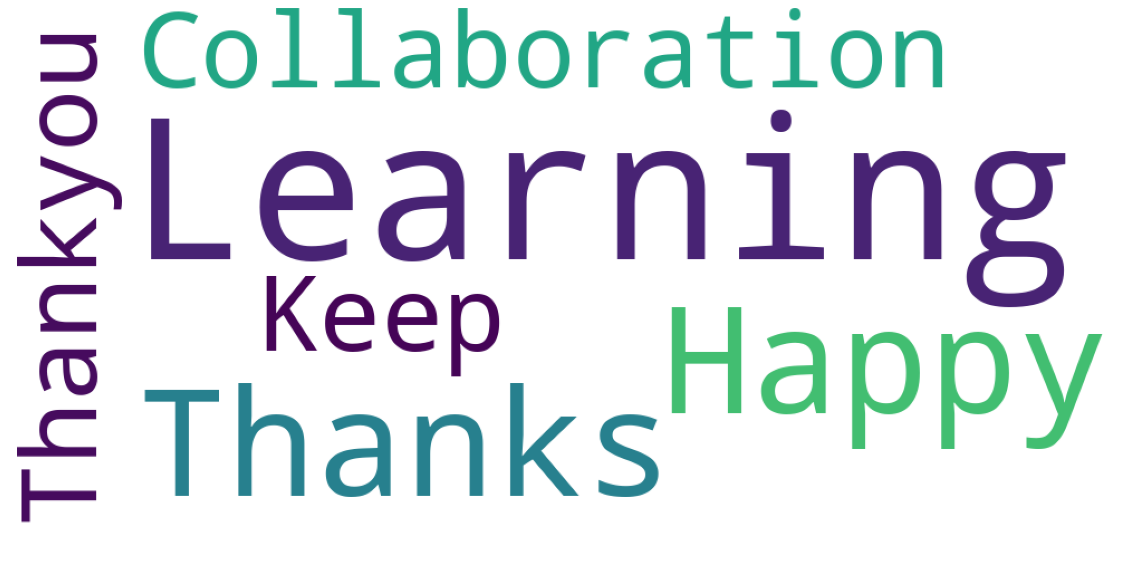

In [168]:
thank_you_str="Thanks,Happy Learning,Collaboration,Thankyou,Keep Learning"
# create WordCloud with converted string
wordcloud = WordCloud(width = 1000, height = 500, random_state=1, background_color='white', collocations=True).generate(thank_you_str)
plt.figure(figsize=(20, 20))
plt.imshow(wordcloud) 
plt.axis("off")
plt.show()